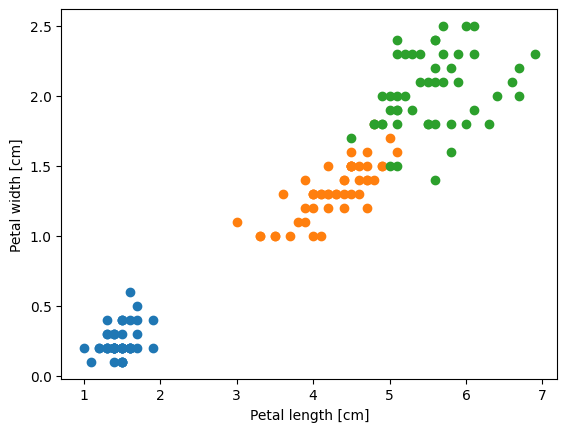

(100, 4) (50, 4) (100,) (50,)
Number of feature 4.0



Test Accuracy: 0.300


Test Accuracy: 0.660


Test Accuracy: 0.660
Test Accuracy: 0.660


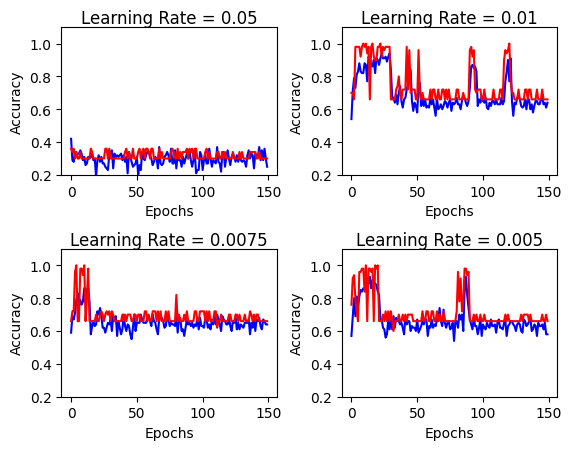

In [1]:
# mlp for multiclass classification
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras import initializers
from numpy import where
from numpy import argmax

# Part 1: load the dataset of iris flower from csv file & display with scatter plot
column_names = ['Sepal length [cm]', 'Sepal width [cm]', 'Petal length [cm]', 'Petal width [cm]', 'Iris type']
csv_path = r'C:\Users\****\Desktop\iris.csv'
df = read_csv(csv_path, header=None, names=column_names)
# Split data into input (X) and output (y) columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer for different classes
y = LabelEncoder().fit_transform(y)

plt.figure(1)
# Display dataset with scatter plot for each class value
for class_value in range(3):
    # select indices of points with the class label
    row_ix = where(y == class_value)
    # scatter plot for points with a different color
    plt.scatter(X[row_ix, 2], X[row_ix, 3])
plt.xlabel('Petal length [cm]'), plt.ylabel('Petal width [cm]')
plt.show() # show scatter plot

# Part 2: Preparing training dataset and testing dataset
def prepare_data():
    # split into train and test datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    # determine the number of input features
    n_features = X_train.shape[1]
    print('Number of feature %.1f' % n_features)
    return X_train, y_train, X_test, y_test

# Part 3: Training the MLP network & evaluate its accuracy for both Train/Test datasets
def fit_model(X_train, y_train, X_test, y_test, lrate):
    # define MLP network model
    model = Sequential()
    # Using GlorotUniform for weight initiliazation
    initializer = initializers.GlorotUniform(seed=1)

    # Add an input layer: dimensionality of the output space = 10 hidden units
    model.add(Dense(10, activation='relu', kernel_initializer=initializer, input_shape=(4,)))
    # Add one Hidden layer: output of this layer is arrays of shape = 8 hidden unit 
    model.add(Dense(8, activation='relu', kernel_initializer=initializer))
    # Add an output layer: ending network with a Dense layer of size 3.
    model.add(Dense(3, activation='softmax'))

    # compile the MLP network  ------------------------------------------------------------------------
    # The loss function is the ‘sparse_categorical_crossentropy‘, which is appropriate for integer encoded class labels
    opt = SGD(lr = lrate, momentum = 0.8)
    model.compile(optimizer=opt,loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # fit the MLP network ------------------------------------------------------------------------------
    # Train the model for 150 epochs or iterations over all the samples
    historyFit = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, verbose=0, batch_size=1)
    # evaluate the model performance-----------------------------------------------------------------
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print('Test Accuracy: %.3f' % acc)
    plt.plot(historyFit.history['accuracy'], label='train', color='b')
    plt.plot(historyFit.history['val_accuracy'], label='test', color='r')
    plt.title('Learning Rate = '+str(lrate), pad=-40)
    plt.ylim([0.2,1.1]), plt.xlabel('Epochs'), plt.ylabel('Accuracy')

# Part 4: Main Program:  
# prepare training and testing datasets -------------------------------------------------
X_train, y_train, X_test, y_test = prepare_data()
# create learning curves for different learning rates
learning_rates = [0.05, 0.01, 0.0075, 0.005]
for i in range(len(learning_rates)):
    # assign different plot number
    plot_no = (i+1)
    plt.subplot(2,2,plot_no)
    # Training MLP model and plot learning curves for a learning rate
    fit_model(X_train, y_train, X_test, y_test, learning_rates[i])
# show learning curves
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()